In [14]:
import os
import pandas as pd
import matplotlib.pyplot as plt

KeyboardInterrupt: 

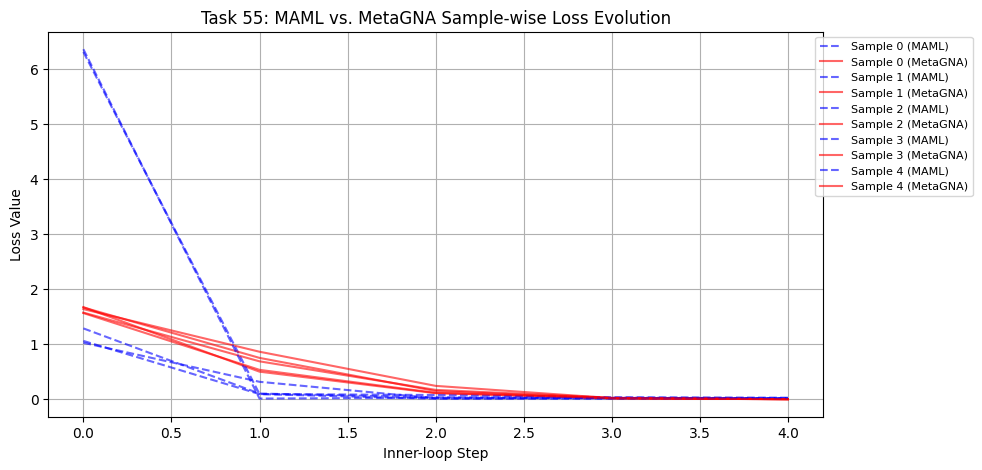

In [15]:
# 파일 경로
MAML_file_path = "Loss_per_Sample/sample_loss_log_MAML(miniImageNet_1shot).csv"
MetaGNA_file_path = "Loss_per_Sample/sample_loss_log_Arbiter(miniImageNet_1shot).csv"

# 저장 경로 설정
save_path = "Loss_per_Sample/Task"
os.makedirs(save_path, exist_ok=True)

# CSV 파일 로드
df_MAML = pd.read_csv(MAML_file_path)
df_MetaGNA = pd.read_csv(MetaGNA_file_path)

# Task 목록 가져오기 (두 파일에서 공통 Task 추출)
task_list = sorted(set(df_MAML["Task_Idx"]).intersection(set(df_MetaGNA["Task_Idx"])))

# 그래프 생성 및 저장
for task in task_list:
    plt.figure(figsize=(10, 5))

    # 특정 Task 데이터 필터링
    task_data_MAML = df_MAML[df_MAML["Task_Idx"] == task]
    task_data_MetaGNA = df_MetaGNA[df_MetaGNA["Task_Idx"] == task]

    # 각 Sample별로 Loss 변화 플로팅 (MAML: 점선, MetaGNA: 실선)
    for sample_id in task_data_MAML["Sample_Index"].unique():
        sample_data_MAML = task_data_MAML[task_data_MAML["Sample_Index"] == sample_id]
        sample_data_MetaGNA = task_data_MetaGNA[task_data_MetaGNA["Sample_Index"] == sample_id]

        plt.plot(sample_data_MAML["Step"], sample_data_MAML["Loss"], 'b--', alpha=0.6, label=f"Sample {sample_id} (MAML)")
        plt.plot(sample_data_MetaGNA["Step"], sample_data_MetaGNA["Loss"], 'r-', alpha=0.6, label=f"Sample {sample_id} (MetaGNA)")

    plt.xlabel("Inner-loop Step")
    plt.ylabel("Loss Value")
    plt.title(f"Task {task}: MAML vs. MetaGNA Sample-wise Loss Evolution")
    plt.legend(loc="upper right", bbox_to_anchor=(1.2, 1), fontsize=8)
    plt.grid(True)

    # 그래프 저장
    plt.savefig(f"{save_path}/Task_{task}_MAML_vs_MetaGNA.png", dpi=300, bbox_inches="tight")
    plt.close()

print(f"✅ 모든 Task별 Loss 비교 그래프가 '{save_path}' 폴더에 저장되었습니다!")
